
# Perform Sentiment Analysis on Movie Reviews#


#Sentiment Analysis using Classification# Classification Algorithm used for this project are: logisitic regression, bernoulli naive bayes classifier and random forest classifier#.

#1 Sentiment Analysis on Movie Reviews using Logistic Regression#

In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df_imdb=pd.read_csv('IMDB Dataset.csv')

#Read csv with pd.read_csv

In [3]:
df_imdb
#Dataframe#

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

#Performing Exploratory Data Analysis#

In [4]:
df_imdb.value_counts()

#Value Counts of imdb movie Reviews dataframe

review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [5]:
df_imdb.shape
#Shape of imdb Dataframe

(50000, 2)

In [6]:
df_imdb.describe()
#Describe Dataframe#

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [7]:
df_imdb.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [8]:
df_imdb.isna()
#Check null values in the dataframe#

review  sentiment
0       False      False
1       False      False
2       False      False
3       False      False
4       False      False
...       ...        ...
49995   False      False
49996   False      False
49997   False      False
49998   False      False
49999   False      False

[50000 rows x 2 columns]

In [9]:
df_imdb.dropna(inplace=True)
#Drop null values in the data#


In [10]:
df_imdb.isnull().sum()
#sum of null values#

review       0
sentiment    0
dtype: int64

In [11]:
df_imdb.duplicated()
#check for duplicates#

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [12]:
df_imdb.duplicated().sum()
#Sum of duplicates#

418

In [13]:
df_imdb.drop_duplicates(inplace=True)

#Drop Duplicates#

#Data Preprocessing#

In [14]:
df_imdb['review']=df_imdb['review'].str.lower()
df_imdb['review'].tail()

#Reduce to lower case#

49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, dtype: object

In [15]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_repeating_char(x))
df_imdb['review']

#Cleaning and removing repeating words

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [16]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_URLs(x))
df_imdb['review']

#Cleaning and Removing Url#

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [17]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_numbers(x))
df_imdb['review']

#Cleaning Numbers

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [18]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df_imdb['review']= df_imdb['review'].apply(lambda x: cleaning_punctuations(x))
df_imdb['review'].tail()

#Remove Punctuations#

49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, dtype: object

In [19]:
df_imdb= df_imdb.replace('br',' ', regex=True)
df_imdb

#Remove br br

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production     the filming ...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[49582 rows x 2 columns]

In [20]:
df_imdb = df_imdb.replace('[</>]','', regex=True)
df_imdb

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production     the filming ...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[49582 rows x 2 columns]

In [21]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_imdb['review']= df_imdb['review'].apply(lambda x: stemming_on_text(x))
df_imdb['review'].head()

#Apply Stemming#

0    one of the other reviewers has mentioned that ...
1    a wonderful little production     the filming ...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [22]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_imdb['review'] = df_imdb['review'].apply(lambda x: lemmatizer_on_text(x))
df_imdb['review'].head()

#Apply Lemmatizer#

0    one of the other reviewers has mentioned that ...
1    a wonderful little production     the filming ...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [23]:
X=df_imdb['review']
y=df_imdb.drop(['review'],axis=1)

#Independent and Dependent Variable#

In [24]:
# library to clean data
import re 
 
# Natural Language Tool Kit
import nltk 
 
nltk.download('stopwords')
 

from nltk.corpus import stopwords
 
# for Stemming propose 
from nltk.stem.porter import PorterStemmer
 



corpus = df_imdb['review']

for i in range(len(X)):
    print(i)    

review = re.sub("[^a-Za-Z]", ' ', df_imdb['Review'][i]) 
review = review.lower()
review = review.split()
ps = PorterStemmer()
review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))] 
review= " ".join(review)
corpus.append(review) 

#corpus created

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADEX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyError: 'Review'

In [25]:
corpus

#corpus of words

0        one of the other reviewers has mentioned that ...
1        a wonderful little production     the filming ...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [26]:
## Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 
 
X= cv.fit_transform(corpus).toarray() 

#transform corpus to array


In [27]:
X
#Corpus transformed into array

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [28]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
y = en.fit_transform(df_imdb['sentiment'])
y

#Label encoding y#

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
X.shape
#Shape of X#

(49582, 1500)

In [30]:
y.shape
#Shape of y#

(49582,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
#Split dataset into training and testing dataset#


In [32]:
X_test.shape
#Shape of Xtest#

(12396, 1500)

In [33]:
y_test.shape
#Shape of y_test#

(12396,)

In [34]:
X_train.shape
#Shape of Xtrain#

(37186, 1500)

In [35]:
y_train.shape
#Shape of ytrain#

(37186,)

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


#Logistic Regression Algorithm#

C:\Users\ADEX\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
X_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [38]:
y_test[0]

1

In [39]:
y_pred=lr.predict(X_test)
print(y_pred)
#Predicted values y_predict 

[1 1 1 ... 0 1 1]


In [40]:
print("Predicted Values:")
print(y_pred)
print("Actual Values:")
print(y_test)

Predicted Values:
[1 1 1 ... 0 1 1]
Actual Values:
[1 0 1 ... 0 1 1]


In [41]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2.head(30)

#dataframe of acutal and predicted#

Actual  Predicted
0        1          1
1        0          1
2        1          1
3        1          1
4        1          1
5        1          0
6        0          0
7        0          0
8        1          1
9        0          0
10       1          1
11       0          0
12       0          1
13       1          0
14       0          0
15       0          0
16       0          0
17       1          1
18       0          1
19       1          1
20       0          0
21       1          1
22       1          0
23       1          1
24       1          0
25       1          1
26       0          0
27       1          1
28       1          1
29       0          0

In [42]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

#Confusion matrix Algorithm

In [43]:
print(cm)
# print Confusion matrix#


[[5338  837]
 [ 720 5501]]


In [44]:
from sklearn.metrics import accuracy_score, classification_report

print("accuracy",accuracy_score(y_test,y_pred))
#Accuracy score is 87.439%#


accuracy 0.8743949661181026


In [45]:
cf=confusion_matrix(y_test,y_pred)
print(cf)
print("Classification Report for Testing Dataset:")
print(classification_report(y_test,y_pred))

#classification report for testing data#

[[5338  837]
 [ 720 5501]]
Classification Report for Testing Dataset:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6175
           1       0.87      0.88      0.88      6221

    accuracy                           0.87     12396
   macro avg       0.87      0.87      0.87     12396
weighted avg       0.87      0.87      0.87     12396



In [46]:
!pip install Wordcloud

#Install Wordcloud#

In [47]:
 from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

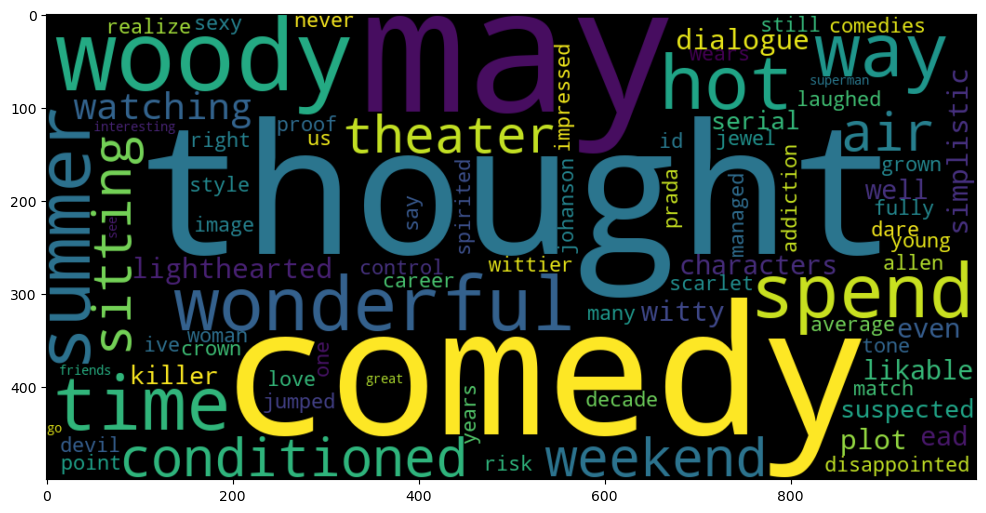

In [48]:
plt.figure(figsize=(12,12))
Positive_review=df_imdb["review"][2]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(Positive_review)
plt.imshow(words,interpolation='bilinear')
plt.show

#cloud of words for positive review

<function matplotlib.pyplot.show(close=None, block=None)>

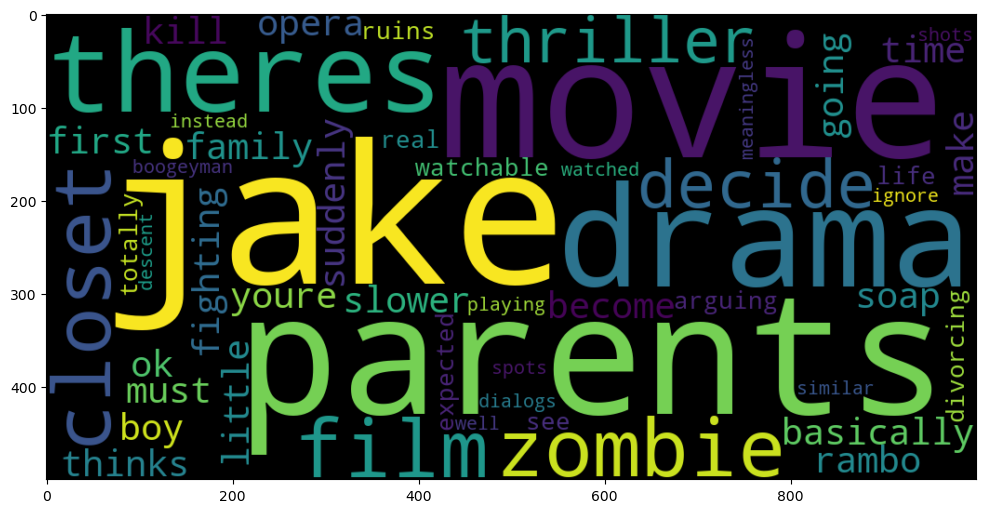

In [49]:
plt.figure(figsize=(12,12))
Negative_Review=df_imdb["review"][3]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(Negative_Review)
plt.imshow(words,interpolation='bilinear')
plt.show

#cloud of words for negative review 

### Using Logisitic Regression to classify Imdb Movie Reviews dataset,
-Accuracy score for Logistic Regression is 87.439% which shows that using Logistic Regression showed a high level of effectivess.
-The cloud of words showed good results for the positive and negative reviews which proves that the nltk library was effective in the data preprocessing.


#2 Sentiment Analysis on Movie Reviews using Bernoulli Naive Bayes classifier#

In [50]:
df_imdb=pd.read_csv('IMDB Dataset.csv')

#Readcsv#

In [51]:
df_imdb
#Dataframe of imdb movies#

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

#Exploratory Data Analysis(EDA)#

In [52]:
df_imdb.value_counts()

#Value Counts of imdb dataframe

review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [53]:
df_imdb.describe()

#Describe df_imdb#

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [54]:
df_imdb.info

#info of dataframe

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [55]:
df_imdb.shape

#shape of dataframe

(50000, 2)

In [56]:
df_imdb.isna()
#Check null values in the dataframe#

review  sentiment
0       False      False
1       False      False
2       False      False
3       False      False
4       False      False
...       ...        ...
49995   False      False
49996   False      False
49997   False      False
49998   False      False
49999   False      False

[50000 rows x 2 columns]

In [57]:
df_imdb.dropna(inplace=True)
#Drop null values in the data#

In [58]:
df_imdb.isnull().sum()
#sum of null values#

review       0
sentiment    0
dtype: int64

In [59]:
df_imdb.duplicated()
#check for duplicates#

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [60]:
df_imdb.duplicated().sum()
#Sum of duplicates#

418

In [61]:
df_imdb.drop_duplicates(inplace=True)

#Drop Duplicates#

In [62]:
df_imdb.duplicated().sum()

#Duplicates Removed#

0

#Data Preprocessing#

In [63]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_repeating_char(x))
df_imdb['review']

#Removing repeating words#

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49582, dtype: object

In [64]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_URLs(x))
df_imdb['review']

#Cleaning and Removing Url#

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49582, dtype: object

In [65]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_numbers(x))
df_imdb['review']

#Cleaning Numbers

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49582, dtype: object

In [66]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df_imdb['review']= df_imdb['review'].apply(lambda x: cleaning_punctuations(x))
df_imdb['review'].tail()

#Remove Punctuations#

49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, dtype: object

In [67]:
df_imdb= df_imdb.replace('br',' ', regex=True)
df_imdb

#Remove br br

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production     The filming ...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically theres a family where a little boy J...  negative
4      Petter Matteis Love in the Time of Money is a ...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot bad dialogue bad acting idiotic direc...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  Im going to have to disagree with the previous...  negative
49999  No one expects the Star Trek movies to be high...  negative

[49582 rows x 2 columns]

In [68]:
df_imdb = df_imdb.replace('[</>]','', regex=True)
df_imdb

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production     The filming ...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically theres a family where a little boy J...  negative
4      Petter Matteis Love in the Time of Money is a ...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot bad dialogue bad acting idiotic direc...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  Im going to have to disagree with the previous...  negative
49999  No one expects the Star Trek movies to be high...  negative

[49582 rows x 2 columns]

In [69]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_imdb['review']= df_imdb['review'].apply(lambda x: stemming_on_text(x))
df_imdb['review'].head()

#Apply Stemming#

0    One of the other reviewers has mentioned that ...
1    A wonderful little production     The filming ...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: review, dtype: object

In [70]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_imdb['review'] = df_imdb['review'].apply(lambda x: lemmatizer_on_text(x))
df_imdb['review'].head()

#Apply Lemmatizer#

0    One of the other reviewers has mentioned that ...
1    A wonderful little production     The filming ...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: review, dtype: object

In [71]:
X=df_imdb['review']
y=df_imdb.drop(['review'],axis=1)

#Independent and Dependent variable#

In [72]:
# library to clean data
import re 
 
# Natural Language Tool Kit
import nltk 
 
nltk.download('stopwords')
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose 
from nltk.stem.porter import PorterStemmer
 



corpus = df_imdb['review']

for i in range(len(X)):
    print(i)    

review = re.sub("[^a-Za-Z]", ' ', df_imdb['Review'][i]) 
review = review.lower()
review = review.split()
ps = PorterStemmer()
review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))] 
review= " ".join(review)
corpus.append(review) 

#corpus created

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADEX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyError: 'Review'

In [73]:
corpus

#corpus of words

0        One of the other reviewers has mentioned that ...
1        A wonderful little production     The filming ...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49582, dtype: object

In [74]:
## Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 
 
X= cv.fit_transform(corpus).toarray() 

#transform corpus to array


In [75]:
X

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [76]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
y = en.fit_transform(df_imdb['sentiment'])
y

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
X.shape
#Shape of X#

(49582, 1500)

In [78]:
y.shape
#Shape of y#

(49582,)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
#Split dataset into training and testing dataset#

In [81]:
y_test.shape
#Shape of ytest#

(12396,)

In [82]:
X_test.shape
#shape of xtest#

(12396, 1500)

In [83]:
y_train.shape
#Shape of ytrain#

(37186,)

In [84]:
X_train.shape
#Shape of xtrain#

(37186, 1500)

In [85]:
y_test[0]

1

In [86]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=1)

bnb.fit(X_train, y_train)

#Bernoulli Naive bayes Model#

BernoulliNB(alpha=1)

In [87]:
y_pred=bnb.predict(X_test)
#y_predict

In [88]:
y_pred

#y_predict

array([1, 0, 0, ..., 0, 1, 0])

In [89]:
from sklearn.metrics import accuracy_score, classification_report

print("accuracy",accuracy_score(y_test,y_pred))
#Accuracy score is 82.72%#

accuracy 0.8272023233301065


In [90]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2.head(30)
#Dataframe of actual and predited#

Actual  Predicted
0        1          1
1        0          0
2        1          0
3        1          1
4        1          1
5        1          0
6        0          0
7        0          0
8        1          1
9        0          1
10       1          1
11       0          0
12       0          1
13       1          0
14       0          0
15       0          0
16       0          1
17       1          1
18       0          1
19       1          1
20       0          0
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       0          0
27       1          1
28       1          1
29       0          0

In [91]:
print("Predicted Values:")
print(y_pred)
print("Actual Values:")
print(y_test)

#Predicted and Actual Values#

Predicted Values:
[1 0 0 ... 0 1 0]
Actual Values:
[1 0 1 ... 0 1 1]


In [92]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

#Confusion matrix Algorithm#

In [93]:
print(cm)
#Confusion matrix#

[[4901 1274]
 [ 868 5353]]


In [94]:
cf=confusion_matrix(y_test,y_pred)
print(cf)
print("Classification Report for Testing Dataset:")
print(classification_report(y_test,y_pred))

#classification report for testing data#

[[4901 1274]
 [ 868 5353]]
Classification Report for Testing Dataset:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      6175
           1       0.81      0.86      0.83      6221

    accuracy                           0.83     12396
   macro avg       0.83      0.83      0.83     12396
weighted avg       0.83      0.83      0.83     12396



In [95]:
 from wordcloud import WordCloud
 #import wordcloud#   

In [96]:
df_imdb['sentiment'].head(30)

0     positive
1     positive
2     positive
3     negative
4     positive
5     positive
6     positive
7     negative
8     negative
9     positive
10    negative
11    negative
12    negative
13    negative
14    positive
15    negative
16    positive
17    negative
18    positive
19    negative
20    positive
21    negative
22    positive
23    negative
24    negative
25    positive
26    positive
27    negative
28    negative
29    positive
Name: sentiment, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

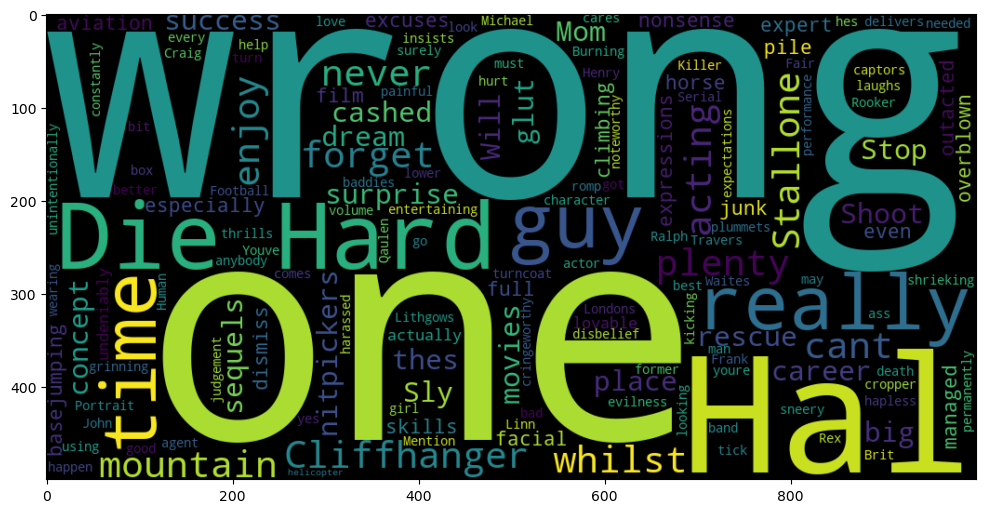

In [97]:
plt.figure(figsize=(12,12))
Positive_review=df_imdb["review"][20]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(Positive_review)
plt.imshow(words,interpolation='bilinear')
plt.show

#cloud of words for positive review

<function matplotlib.pyplot.show(close=None, block=None)>

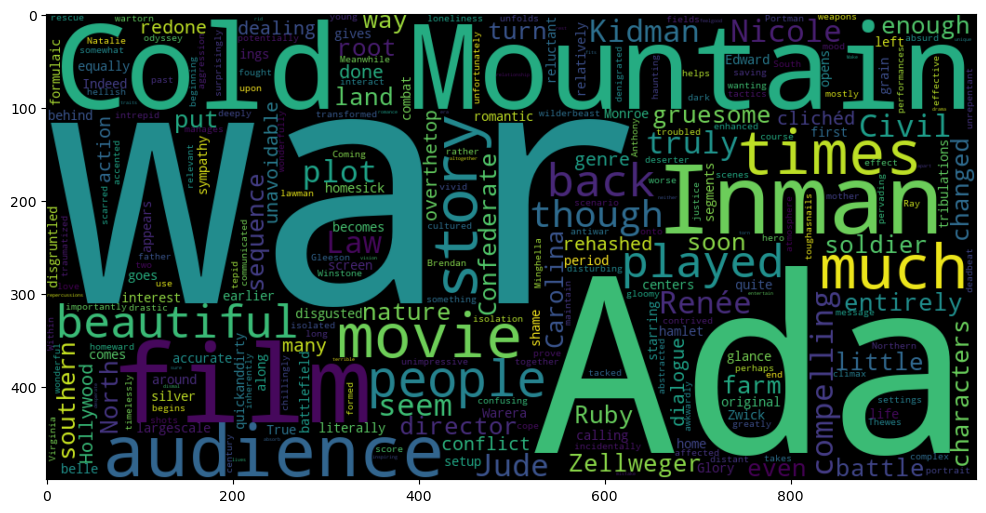

In [98]:
plt.figure(figsize=(12,12))
Negative_Review=df_imdb["review"][29]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(Negative_Review)
plt.imshow(words,interpolation='bilinear')
plt.show

#cloud of words for negative review 

###Using Bernoulli Naive Bayes to classify Imdb Movie Reviews dataset,
#-Accuracy score for Bernoulli Naive bayes is 82% which shows that using Bernoulli Naive Bayes classifier showed a high level of effectivess.
#-The cloud of words showed good results for the positive and negative reviews which proves that the nltk library was effective in the data preprocessing.


#Sentiment Analysis on movie Review using RandomForest Classifier#

In [99]:
df_imdb=pd.read_csv('IMDB Dataset.csv')

#Read csv with pd.read_csv

In [100]:
df_imdb
#Dataframe

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

#Exploratory Data Analysis(EDA)#

In [102]:
df_imdb.value_counts()

#Value Counts of imdb dataframe

review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [103]:
df_imdb.shape
#Shape of imdb Dataframe#

(50000, 2)

In [104]:
df_imdb.info
#info of imdb Dataframe#

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [105]:
df_imdb.describe()
#Describe Dataframe#

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [106]:
df_imdb.isna()
#Check null values in the dataframe#

review  sentiment
0       False      False
1       False      False
2       False      False
3       False      False
4       False      False
...       ...        ...
49995   False      False
49996   False      False
49997   False      False
49998   False      False
49999   False      False

[50000 rows x 2 columns]

In [107]:
df_imdb.dropna(inplace=True)
#Drop null values in the dataframe#

In [108]:
df_imdb.isnull().sum()
#sum of null values#

review       0
sentiment    0
dtype: int64

In [109]:
df_imdb.duplicated()
#check for duplicates#

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [110]:
df_imdb.duplicated().sum()
#Sum of duplicates#

418

In [111]:
df_imdb.drop_duplicates(inplace=True)

#Drop Duplicates#

In [112]:
df_imdb.duplicated().sum()
#Sum of duplicates#

0

#Data Preprocessing#

In [113]:
df_imdb['review']=df_imdb['review'].str.lower()
df_imdb['review'].tail()

#Reduce to lower case#

49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, dtype: object

In [114]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_repeating_char(x))
df_imdb['review']

#Cleaning and removing repeating words

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [115]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_URLs(x))
df_imdb['review']

#Cleaning and Removing Url#

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [116]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_imdb['review'] = df_imdb['review'].apply(lambda x: cleaning_numbers(x))
df_imdb['review']

#Cleaning Numbers

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [117]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df_imdb['review']= df_imdb['review'].apply(lambda x: cleaning_punctuations(x))
df_imdb['review'].tail()

#Remove Punctuations#

49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, dtype: object

In [118]:
df_imdb= df_imdb.replace('br',' ', regex=True)
df_imdb

#Remove br br

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production     the filming ...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[49582 rows x 2 columns]

In [119]:
df_imdb = df_imdb.replace('[</>]','', regex=True)
df_imdb

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production     the filming ...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[49582 rows x 2 columns]

In [120]:
df_imdb.shape   
#shape of imdb dataset#

(49582, 2)

In [121]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_imdb['review']= df_imdb['review'].apply(lambda x: stemming_on_text(x))
df_imdb['review'].head()

#Apply Stemming#

0    one of the other reviewers has mentioned that ...
1    a wonderful little production     the filming ...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [122]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_imdb['review'] = df_imdb['review'].apply(lambda x: lemmatizer_on_text(x))
df_imdb['review'].head()

#Apply Lemmatizer#

0    one of the other reviewers has mentioned that ...
1    a wonderful little production     the filming ...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [123]:
X=df_imdb['review']
y=df_imdb.drop(['review'],axis=1)

#Independent and Dependent variable#

In [124]:
# library to clean data
import re 
 
# Natural Language Tool Kit
import nltk 
 
nltk.download('stopwords')
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose 
from nltk.stem.porter import PorterStemmer
 



corpus = df_imdb['review']

for i in range(len(X)):
    print(i)    

review = re.sub("[^a-Za-Z]", ' ', df_imdb['Review'][i]) 
review = review.lower()
review = review.split()
ps = PorterStemmer()
review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))] 
review= " ".join(review)
corpus.append(review) 

#corpus created

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADEX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyError: 'Review'

In [125]:
corpus

#corpus of words

0        one of the other reviewers has mentioned that ...
1        a wonderful little production     the filming ...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [126]:
## Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 
 
X= cv.fit_transform(corpus).toarray() 

#transform corpus to array


In [127]:
X
#Corpus transformed into array

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [128]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
y = en.fit_transform(df_imdb['sentiment'])
y

#label encoding and transfroming y

array([1, 1, 1, ..., 0, 0, 0])

In [129]:
X.shape
#Shape of X#

(49582, 1500)

In [130]:
y.shape
#Shape of y#

(49582,)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
#Split dataset into training and testing dataset#

In [132]:
y_test.shape
#shape of y_test#

(12396,)

In [133]:
X_test.shape
#Shape of X_test#

(12396, 1500)

In [134]:
from sklearn.ensemble import RandomForestClassifier

rfclassifier=RandomForestClassifier()
rfclassifier=rfclassifier.fit(X_train,y_train)

#Randomforest Classifier#

In [135]:
y_pred=rfclassifier.predict(X_test)
#ypred#

In [136]:
y_pred
#y_predict#

array([1, 0, 1, ..., 0, 1, 1])

In [137]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2.head(30)

#Actual and Predicted Dataframe#

Actual  Predicted
0        1          1
1        0          0
2        1          1
3        1          0
4        1          1
5        1          0
6        0          0
7        0          0
8        1          1
9        0          1
10       1          1
11       0          0
12       0          1
13       1          0
14       0          0
15       0          0
16       0          0
17       1          1
18       0          1
19       1          1
20       0          0
21       1          1
22       1          1
23       1          1
24       1          0
25       1          1
26       0          0
27       1          1
28       1          1
29       0          0

In [138]:
print("Predicted Values:")
print(y_pred)
print("Actual Values:")
print(y_test)

#Print Predicted and Actual Values#

Predicted Values:
[1 0 1 ... 0 1 1]
Actual Values:
[1 0 1 ... 0 1 1]


In [139]:
from sklearn.metrics import accuracy_score, classification_report

print("accuracy",accuracy_score(y_test,y_pred))

#Accuracy 83.833%

accuracy 0.8383349467570184


In [140]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

#Confusion matrix Algorithm#

In [141]:
print(cm)
#Confusion matrix 

[[5126 1049]
 [ 955 5266]]


In [142]:
cf=confusion_matrix(y_test,y_pred)
print(cf)
print("Classification Report for Testing Dataset:")
print(classification_report(y_test,y_pred))

#classification report for testing data#

[[5126 1049]
 [ 955 5266]]
Classification Report for Testing Dataset:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6175
           1       0.83      0.85      0.84      6221

    accuracy                           0.84     12396
   macro avg       0.84      0.84      0.84     12396
weighted avg       0.84      0.84      0.84     12396



<function matplotlib.pyplot.show(close=None, block=None)>

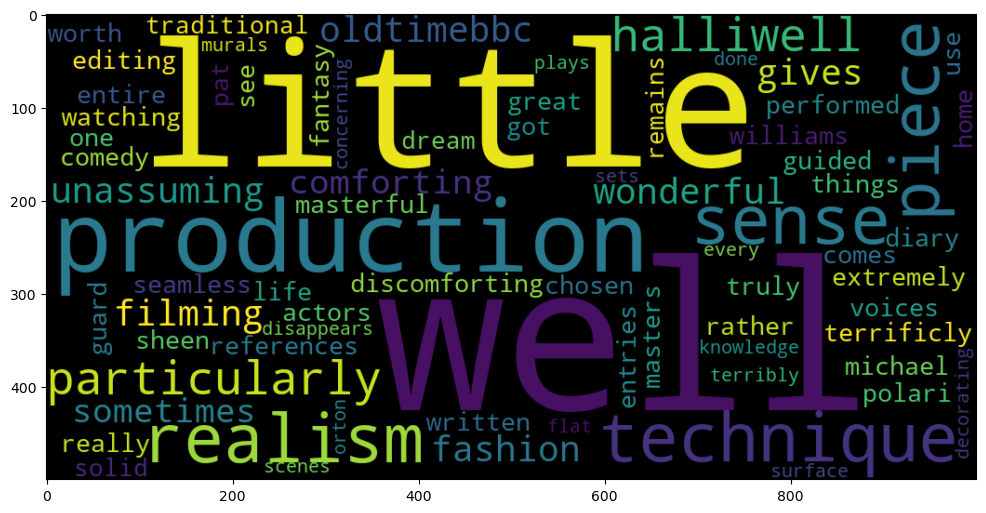

In [143]:
plt.figure(figsize=(12,12))
Positive_review=df_imdb["review"][1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(Positive_review)
plt.imshow(words,interpolation='bilinear')
plt.show

#cloud of words for positive review

<function matplotlib.pyplot.show(close=None, block=None)>

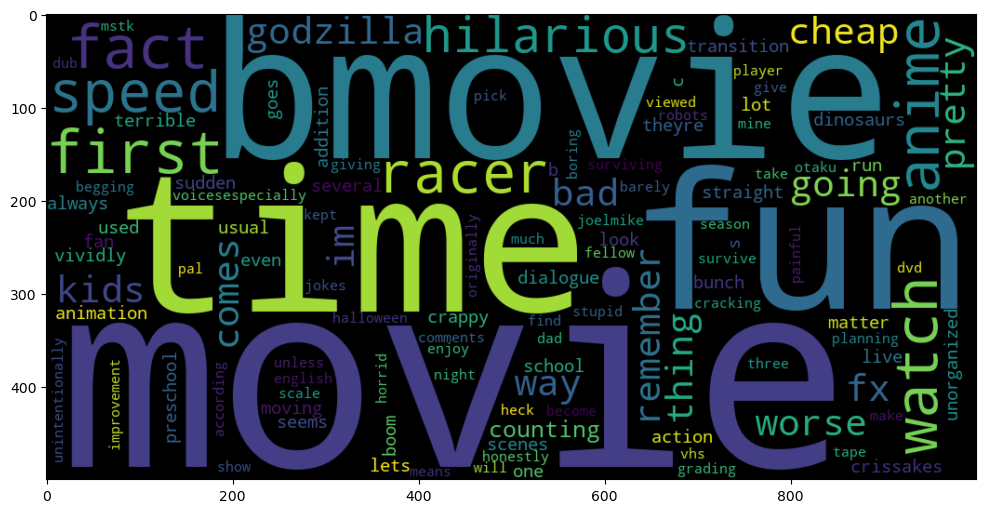

In [145]:
plt.figure(figsize=(12,12))
Negative_Review=df_imdb["review"][23]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(Negative_Review)
plt.imshow(words,interpolation='bilinear')
plt.show

#cloud of words for negative review 

#Using RandomForest to classify Imdb Movie Reviews dataset,
#-Accuracy score for RandomForest classifier is 83.833% which shows that using RandomForest showed a high level of effectivess.
#-The cloud of words showed good results for the positive and negative reviews which proves that the nltk library was effective in the data preprocessing#.


##Result and Conclusion 
From the results, it can be concluded from the three classification method: logistic Regression; bernoulli naive bayes and randomforest classifier and the following results were determined:
-Logisitic regression has the highest accuracy of 87.439%. It is actually a very reliable classification method; it is a well established statistical method used in classification.
-Logisitic regression provides interpretable coeeficients that shows the relationship between predictors and the outcome. It is relatively fast.
-Randomforest clasifier is ranked second with an accuracy of 83.833%. It is also a reliable classification method. 
-Randomforest classifier is one of the best classification techniques. It is a fast and flexible model.
-Bernoulli naive bayes classifier is ranked third with an accuracy of 82.72%. It is also a reliable classification method
-bernoulli naive bayes classifier is a computational efficient algorithm suitable for large datasets and real-time applications.
-All the classification models used for this project are effective

